In [1]:
from pyspark.sql import SparkSession, SQLContext, DataFrame

In [2]:
spark = SparkSession.builder.master("spark://master:7077") \
    .appName('demo') \
    .config("spark.jars", "/tsi/target/scala-2.12/tsi_2.12-0.1.0.jar") \
    .getOrCreate()
sc = spark.sparkContext

In [3]:
from py4j.java_gateway import java_import
java_import(sc._gateway.jvm,"com.microsoft.tsi.*")
connector = sc._gateway.jvm.Connector()

In [4]:
jdf = connector.getDataFrame(spark._jsparkSession)
df = DataFrame(jdf, SQLContext(sc))
df.show()

+-----+---------+------------------+
|ts_id|timestamp|              temp|
+-----+---------+------------------+
|my_id|        0| 41.75918764832732|
|my_id|        1| 42.13265445684641|
|my_id|        2| 42.18813288822376|
|my_id|        3| 41.69045724571928|
|my_id|        4| 41.28750979667714|
|my_id|        5|41.152889136977315|
|my_id|        6|41.108115222348005|
|my_id|        7|40.866360435263246|
|my_id|        8|40.386678672723036|
|my_id|        9| 40.87615761915036|
|my_id|       10| 40.78916524139331|
|my_id|       11| 40.75240981976228|
|my_id|       12|40.962425292123136|
|my_id|       13|40.999650623482594|
|my_id|       14| 40.55150809475374|
|my_id|       15| 40.73874352850483|
|my_id|       16| 40.68701704371652|
|my_id|       17| 40.26411076700002|
|my_id|       18|  40.7144527453407|
|my_id|       19| 41.15076366583789|
+-----+---------+------------------+
only showing top 20 rows



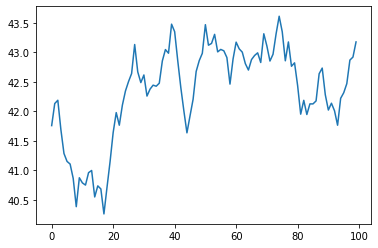

In [5]:
pdf = df.toPandas()
import matplotlib.pyplot as plt
_ = plt.plot(pdf['timestamp'], pdf['temp'])